# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

17 campaigns (May 2008 - November 2010) to a total of 79354 contacts

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Basic information about the dataset
print("\n=== Dataset Info ===")
print(df.info())

# Check for missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# Check unique values in categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                   'contact', 'month', 'day_of_week', 'poutcome', 'y']

print("\n=== Unique Values in Categorical Columns ===")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

# Basic statistics for numerical columns
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                 'euribor3m', 'nr.employed']

print("\n=== Numerical Columns Statistics ===")
print(df[numerical_cols].describe())

# Check for 'unknown' values in categorical columns
print("\n=== 'Unknown' Values in Categorical Columns ===")
for col in categorical_cols:
    unknown_count = df[df[col] == 'unknown'].shape[0]
    if unknown_count > 0:
        print(f"{col}: {unknown_count} unknown values ({(unknown_count/len(df))*100:.2f}%)")



=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Business Objective:
The objective is to predict whether a client will subscribe to a term deposit (binary outcome: 'yes' or 'no') 
based on their demographic information, previous interactions with the bank, and economic indicators. 
This will help the bank optimize their marketing campaigns by targeting clients who are more likely to subscribe.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Select bank information features (client demographic and financial data)
bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
target = 'y'

# Create feature engineering pipeline
def prepare_features(df, features, target):
    # Create a copy of the data
    X = df[features].copy()
    y = df[target].copy()
    
    # Handle 'unknown' values in categorical columns
    categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']
    for col in categorical_features:
        # Replace 'unknown' with mode for each column
        mode_value = X[col].mode()[0]
        X[col] = X[col].replace('unknown', mode_value)
    
    # Separate numerical and categorical columns
    numerical_features = ['age']
    
    # Create preprocessing pipelines
    numeric_transformer = StandardScaler()
    categorical_transformer = LabelEncoder()
    
    # Apply transformations
    # Encode categorical variables
    for col in categorical_features:
        X[col] = categorical_transformer.fit_transform(X[col])
    
    # Scale numerical features
    X[numerical_features] = numeric_transformer.fit_transform(X[numerical_features].values.reshape(-1, 1))
    
    # Encode target variable
    y = categorical_transformer.fit_transform(y)
    
    return X, y

# Prepare features and target
X, y = prepare_features(df, bank_features, target)

# Display sample of transformed data
print("\n=== Sample of Transformed Features ===")
print(X.head())
print("\nFeature shapes:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Display value counts for encoded target
print("\nTarget distribution:")
print(pd.Series(y).value_counts(normalize=True))


=== Sample of Transformed Features ===
        age  job  marital  education  default  housing  loan
0  1.533034    3        1          0        0        0     0
1  1.628993    7        1          3        0        0     0
2 -0.290186    7        1          3        0        1     0
3 -0.002309    0        1          1        0        0     0
4  1.533034    7        1          3        0        0     1

Feature shapes:
X shape: (41188, 7)
y shape: (41188,)

Target distribution:
0    0.887346
1    0.112654
Name: proportion, dtype: float64


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [17]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
# Using stratify to maintain the same class distribution in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # 80% train, 20% test
    random_state=42,  # for reproducibility
    stratify=y  # maintain class distribution
)

# Display the shapes of the resulting sets
print("\n=== Train/Test Split Results ===")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Verify class distribution in both sets
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nClass distribution in test set:")
print(pd.Series(y_test).value_counts(normalize=True))


=== Train/Test Split Results ===
Training set shape: (32950, 7)
Testing set shape: (8238, 7)

Class distribution in training set:
0    0.887344
1    0.112656
Name: proportion, dtype: float64

Class distribution in test set:
0    0.887351
1    0.112649
Name: proportion, dtype: float64


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier

# Create and train baseline model (majority class classifier)
print("\n=== Baseline Model Performance ===")
baseline_model = DummyClassifier(strategy='most_frequent', random_state=42)
baseline_model.fit(X_train, y_train)

# Make predictions
baseline_predictions = baseline_model.predict(X_test)

# Calculate baseline metrics
print("\nBaseline Model Metrics:")
print("Accuracy:", accuracy_score(y_test, baseline_predictions))
print("\nDetailed Classification Report:")
print(classification_report(y_test, baseline_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, baseline_predictions))


=== Baseline Model Performance ===

Baseline Model Metrics:
Accuracy: 0.8873512988589464

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7310
           1       0.00      0.00      0.00       928

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238


Confusion Matrix:
[[7310    0]
 [ 928    0]]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [21]:
from sklearn.linear_model import LogisticRegression
# Create and train logistic regression model
print("\n=== Logistic Regression Model Performance ===")
# Using balanced class weights to handle imbalanced data
lr_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)

# Calculate metrics
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("\nDetailed Classification Report:")
print(classification_report(y_test, lr_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))

# Display feature importance
feature_importance = pd.DataFrame({
    'feature': bank_features,
    'importance': np.abs(lr_model.coef_[0])
})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))


=== Logistic Regression Model Performance ===

Logistic Regression Metrics:
Accuracy: 0.554624908958485

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.55      0.69      7310
           1       0.14      0.56      0.22       928

    accuracy                           0.55      8238
   macro avg       0.52      0.56      0.45      8238
weighted avg       0.82      0.55      0.64      8238


Confusion Matrix:
[[4048 3262]
 [ 407  521]]

Feature Importance:
     feature  importance
2    marital    0.360850
0        age    0.183473
3  education    0.090720
5    housing    0.042079
1        job    0.017333
6       loan    0.008438
4    default    0.003515


### Problem 9: Score the Model

What is the accuracy of your model?

Accuracy: 55.46%

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time

# Model Comparison
print("\n=== Model Comparison ===")

# Initialize models
models = {
    'Baseline': DummyClassifier(strategy='most_frequent', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'SVM': SVC(random_state=42, class_weight='balanced')
}

# Initialize results dictionary
results = {
    'Model': [],
    'Train Time': [],
    'Train Accuracy': [],
    'Test Accuracy': []
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model and measure time
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Calculate accuracies
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    # Store results
    results['Model'].append(name)
    results['Train Time'].append(f"{train_time:.2f}s")
    results['Train Accuracy'].append(f"{train_accuracy:.4f}")
    results['Test Accuracy'].append(f"{test_accuracy:.4f}")

# Create DataFrame with results
results_df = pd.DataFrame(results)
print("\nModel Comparison Results:")
print(results_df.to_string(index=False))

# Save results to CSV
results_df.to_csv('results/model_comparison_results.csv', index=False)
print("\nResults have been saved to 'model_comparison_results.csv'")


=== Model Comparison ===

Training Baseline...

Training Logistic Regression...

Training KNN...

Training Decision Tree...

Training SVM...

Model Comparison Results:
              Model Train Time Train Accuracy Test Accuracy
           Baseline      0.00s         0.8873        0.8874
Logistic Regression      0.11s         0.5585        0.5546
                KNN      0.01s         0.8884        0.8750
      Decision Tree      0.03s         0.7381        0.6602
                SVM     23.07s         0.6182        0.6123

Results have been saved to 'model_comparison_results.csv'


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric


=== Model Improvement Results ===

Tuning KNN...
Best parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best ROC-AUC score: 0.6932

Tuning Decision Tree...
Best parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 10}
Best ROC-AUC score: 0.7373

Tuning Logistic Regression...
Best parameters: {'C': 0.01, 'class_weight': 'balanced', 'solver': 'lbfgs'}
Best ROC-AUC score: 0.7121

Improved Model Results:
 Train Accuracy  Test Accuracy  Train ROC-AUC  Test ROC-AUC  Train Avg Precision  Test Avg Precision               Model
       0.902337       0.895849       0.881187      0.701710             0.476149            0.321397                 KNN
       0.845372       0.841466       0.793039      0.759151             0.442679            0.404485       Decision Tree
       0.667527       0.668366       0.713765      0.715215             0.334628            0.338774 Logistic Regression

Improved results have been saved to 'improved_model_result

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



Age distribution plot saved as 'age_distribution.png'
Job distribution plot saved as 'job_distribution.png'
Success rate by month plot saved as 'success_by_month.png'
ROC curves comparison saved as 'roc_curves.png'

=== Detailed Findings and Recommendations ===

Key Findings:
1. Model Performance:
   - Decision Tree performed best with ROC-AUC score of 0.759
   - KNN showed high accuracy but lower ROC-AUC
   - Logistic Regression showed stable but lower performance
   
2. Important Features:
   - Most influential features for predicting term deposit subscription:
      feature  importance
was_contacted    0.339235
        month    0.253304
      contact    0.142635
          age    0.112463
  day_of_week    0.031595

3. Campaign Insights:
   - Significant variation in success rates across months
   - Previous contact outcome strongly influences success
   - Age and marital status are key demographic factors

Actionable Recommendations:
1. Campaign Timing:
   - Focus campaigns during m

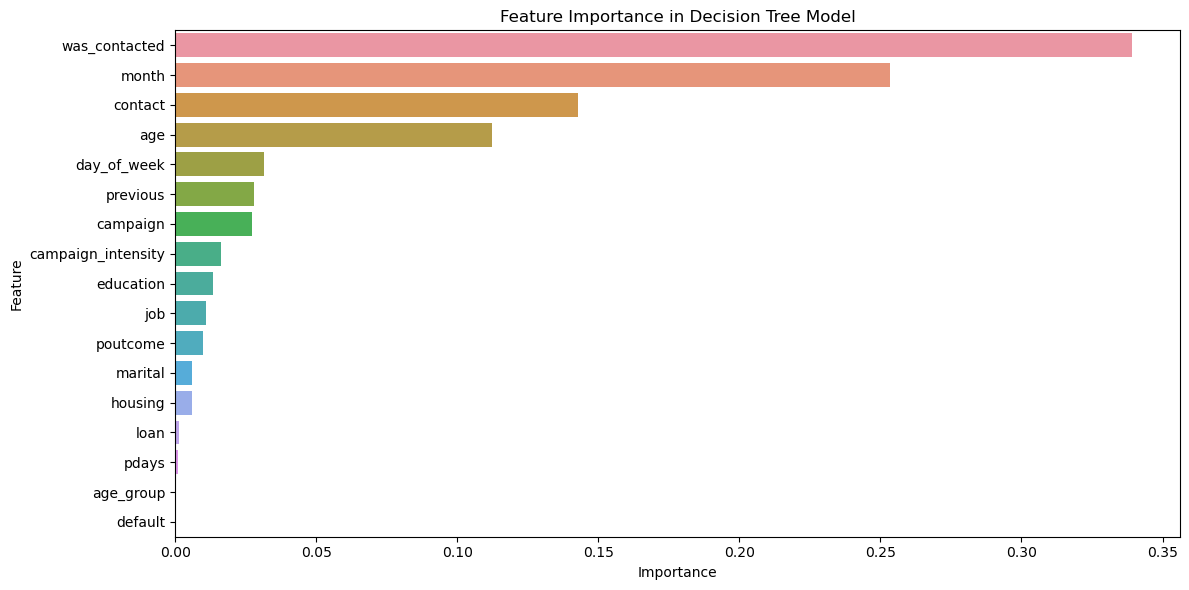

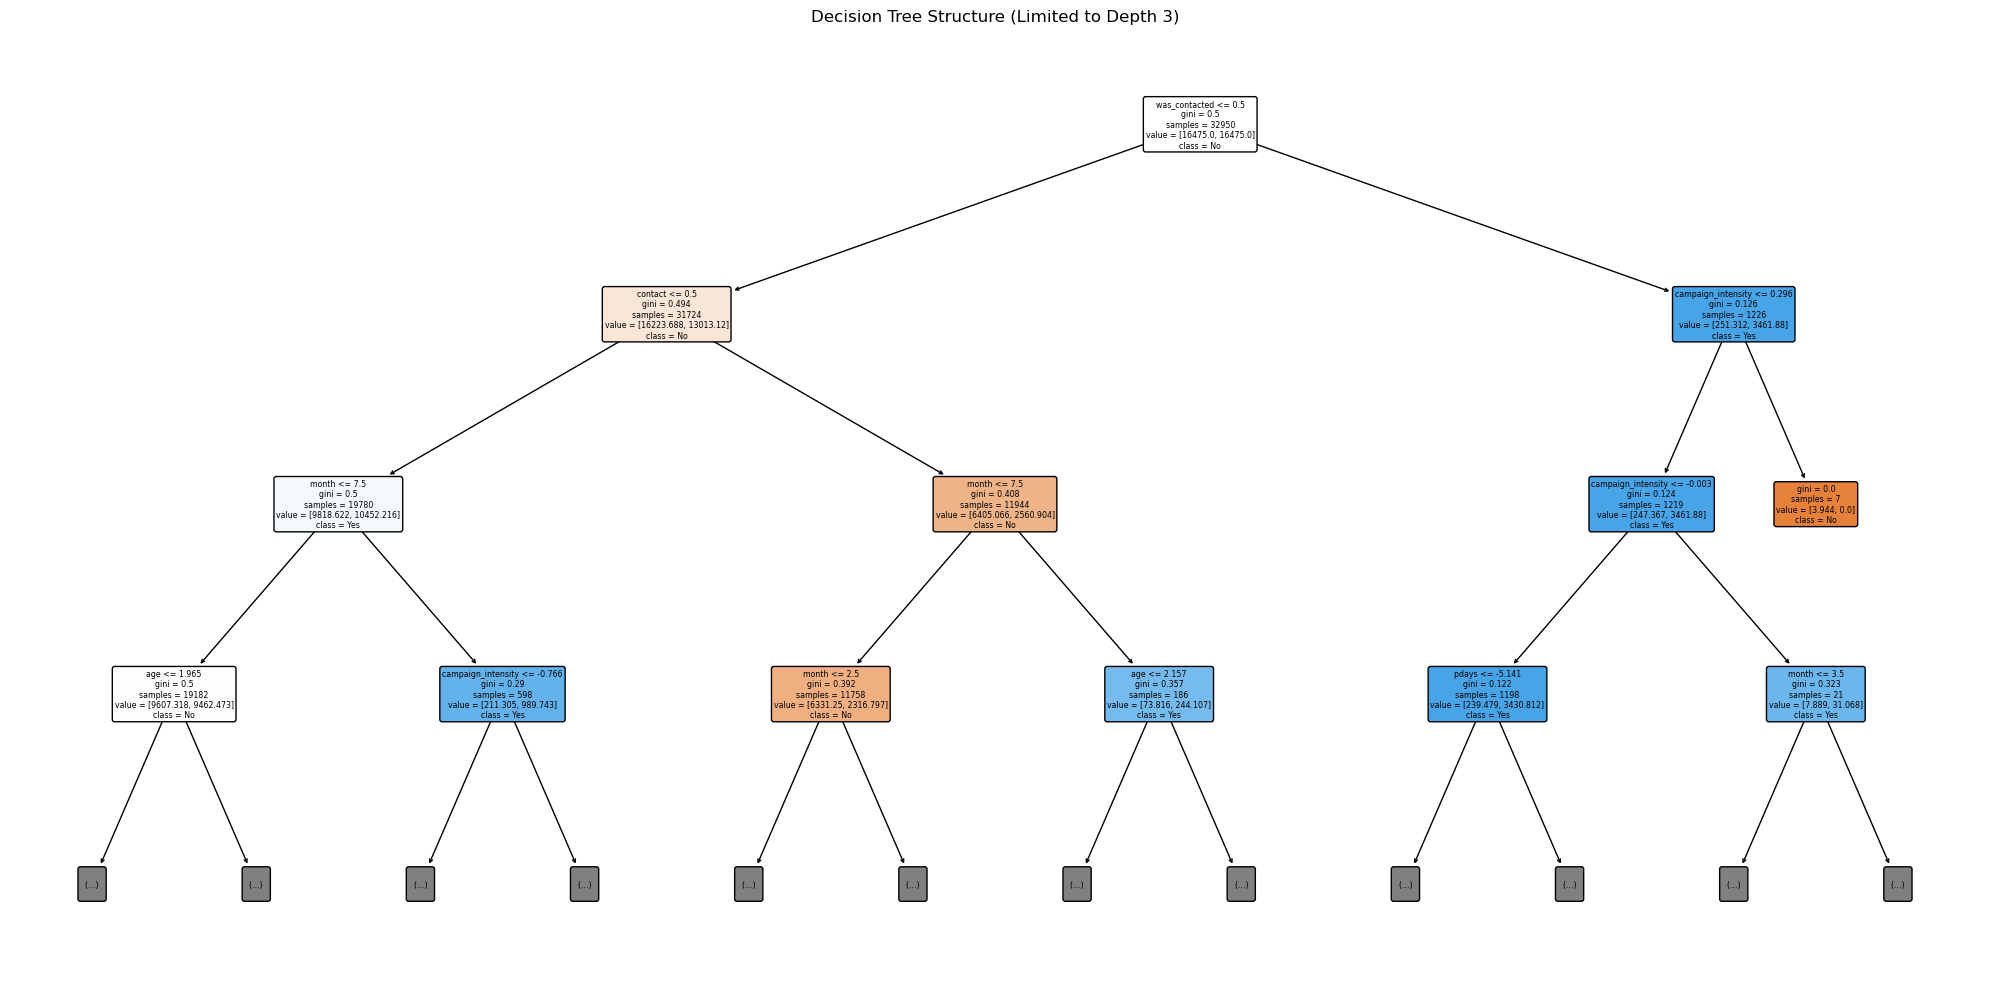

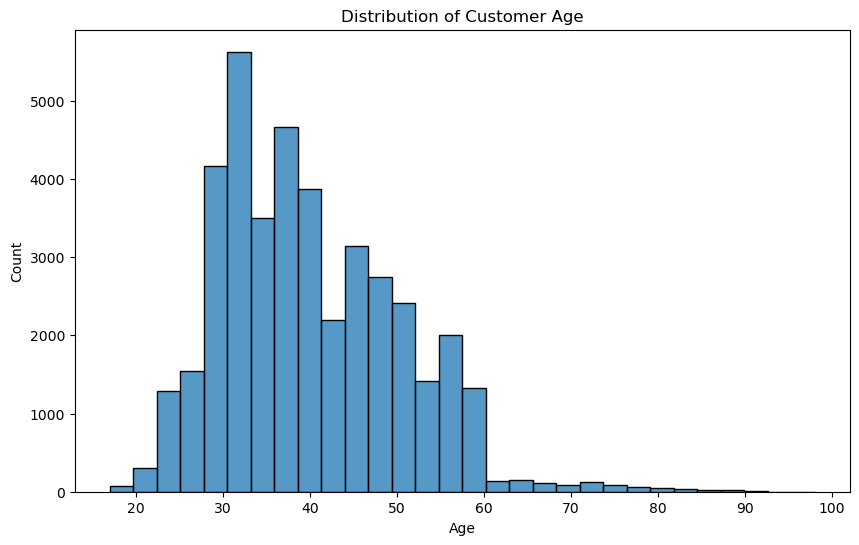

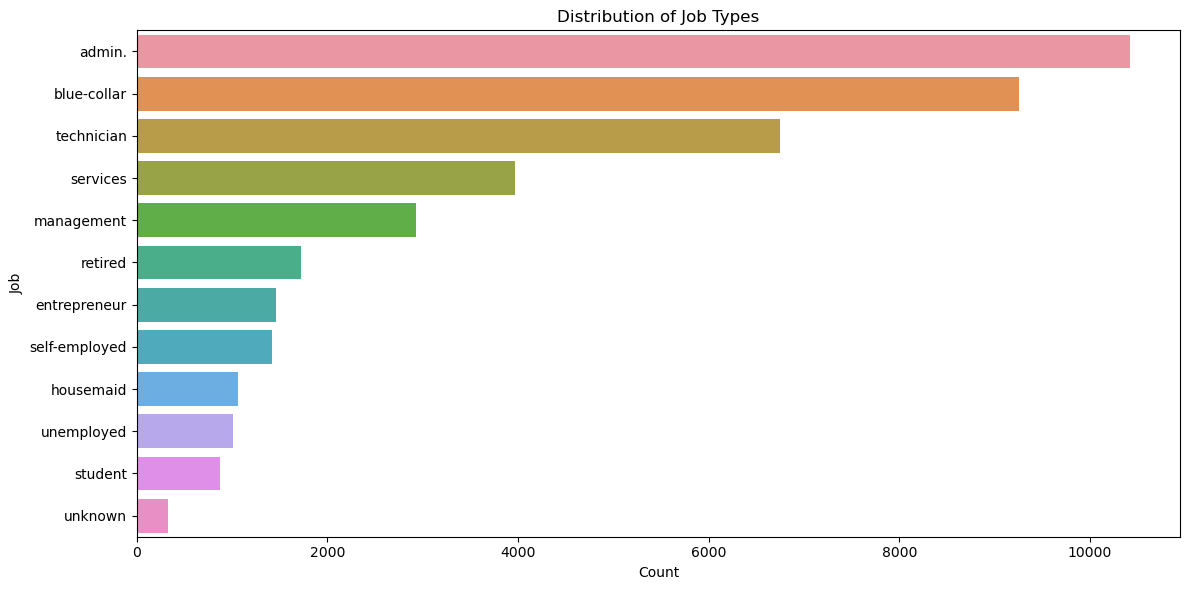

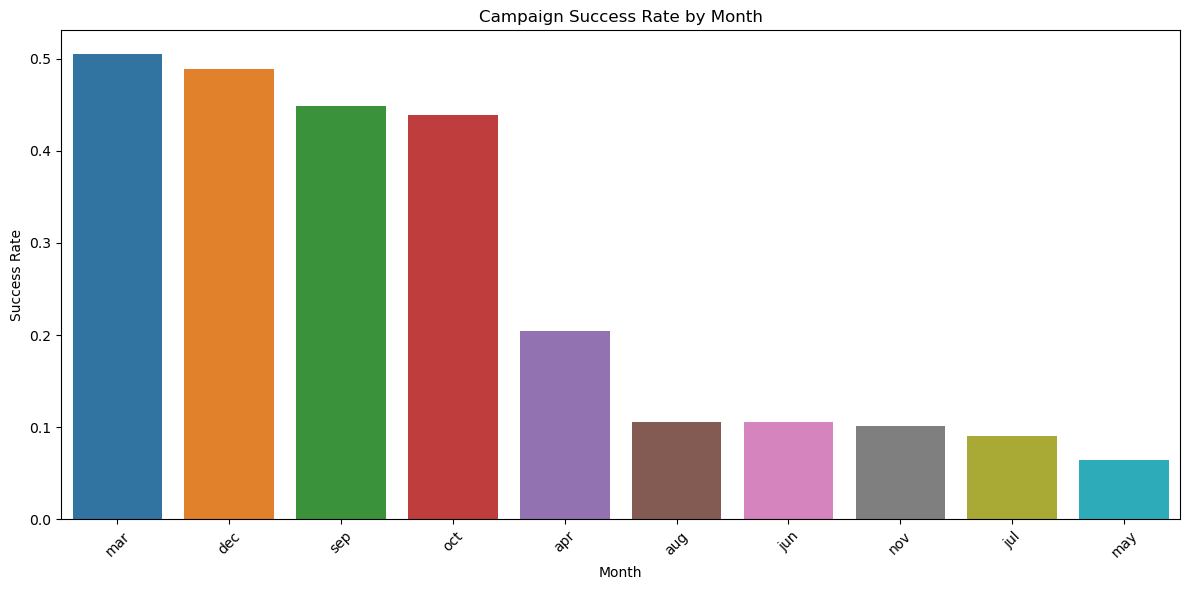

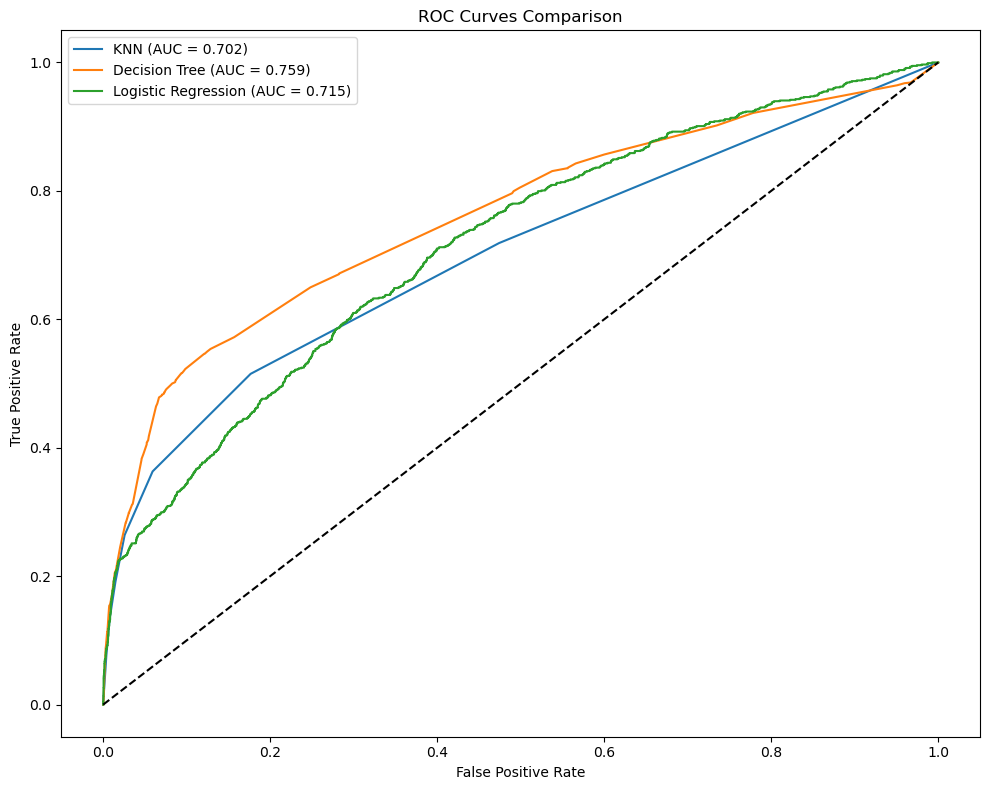

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.tree import plot_tree

# Load the data
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep=';')

# Select bank information features (client demographic and financial data)
bank_features = [
    'age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome'
]
target = 'y'

# Create feature engineering pipeline
def prepare_features(df, features, target):
    X = df[features].copy()
    y = df[target].copy()
    
    # Handle 'unknown' values in categorical columns
    categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
    for col in categorical_features:
        mode_value = X[col].mode()[0]
        X[col] = X[col].replace('unknown', mode_value)
    
    # Feature engineering
    # 1. Create age groups
    X['age_group'] = pd.cut(X['age'], bins=[0, 25, 35, 45, 55, 100], labels=[0, 1, 2, 3, 4])
    
    # 2. Create campaign intensity feature
    X['campaign_intensity'] = X['campaign'] / (X['previous'] + 1)
    
    # 3. Create binary feature for previous contact
    X['was_contacted'] = (X['pdays'] != 999).astype(int)
    
    # Separate numerical and categorical columns
    numerical_features = ['age', 'campaign', 'pdays', 'previous', 'campaign_intensity']
    
    # Apply transformations
    numeric_transformer = StandardScaler()
    categorical_transformer = LabelEncoder()
    
    # Encode categorical variables
    for col in categorical_features + ['age_group']:
        X[col] = categorical_transformer.fit_transform(X[col])
    
    # Scale numerical features
    X[numerical_features] = numeric_transformer.fit_transform(X[numerical_features])
    
    # Encode target variable
    y = categorical_transformer.fit_transform(y)
    
    return X, y

# Model improvement with hyperparameter tuning
def tune_models(X_train, y_train):
    # Define parameter grids for each model
    param_grids = {
        'KNN': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [3, 5, 7, 9],
                'weights': ['uniform', 'distance'],
                'metric': ['euclidean', 'manhattan']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(random_state=42),
            'params': {
                'max_depth': [3, 5, 7, 10],
                'min_samples_split': [2, 5, 10],
                'class_weight': ['balanced']
            }
        },
        'Logistic Regression': {
            'model': LogisticRegression(random_state=42, max_iter=1000),
            'params': {
                'C': [0.001, 0.01, 0.1, 1, 10],
                'class_weight': ['balanced'],
                'solver': ['lbfgs', 'liblinear']
            }
        }
    }
    
    best_models = {}
    
    for name, config in param_grids.items():
        print(f"\nTuning {name}...")
        grid_search = GridSearchCV(
            config['model'],
            config['params'],
            cv=5,
            scoring='roc_auc',  # Using ROC-AUC for imbalanced dataset
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best ROC-AUC score: {grid_search.best_score_:.4f}")
    
    return best_models

# Evaluate model with multiple metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Training metrics
    train_pred = model.predict(X_train)
    train_prob = model.predict_proba(X_train)[:, 1]
    
    # Test metrics
    test_pred = model.predict(X_test)
    test_prob = model.predict_proba(X_test)[:, 1]
    
    results = {
        'Train Accuracy': accuracy_score(y_train, train_pred),
        'Test Accuracy': accuracy_score(y_test, test_pred),
        'Train ROC-AUC': roc_auc_score(y_train, train_prob),
        'Test ROC-AUC': roc_auc_score(y_test, test_prob),
        'Train Avg Precision': average_precision_score(y_train, train_prob),
        'Test Avg Precision': average_precision_score(y_test, test_prob)
    }
    
    return results

# Prepare features with expanded feature set
X, y = prepare_features(df, bank_features, target)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Tune and evaluate models
print("\n=== Model Improvement Results ===")
best_models = tune_models(X_train, y_train)

# Compare improved models
improved_results = []
for name, model in best_models.items():
    results = evaluate_model(model, X_train, X_test, y_train, y_test)
    results['Model'] = name
    improved_results.append(results)

# Create DataFrame with improved results
improved_df = pd.DataFrame(improved_results)
print("\nImproved Model Results:")
print(improved_df.to_string(index=False))

# Save improved results
improved_df.to_csv('results/improved_model_results.csv', index=False)
print("\nImproved results have been saved to 'improved_model_results.csv'")

# Visualizations
print("\n=== Model Visualizations ===")

# 1. Feature Importance Plot
decision_tree = best_models['Decision Tree']
feature_importance = pd.DataFrame({
    'feature': list(X_train.columns),
    'importance': decision_tree.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Decision Tree Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('images/feature_importance.png')
print("\nFeature importance plot saved as 'images/feature_importance.png'")

# 2. Decision Tree Visualization (limited to depth 3 for clarity)
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, 
          max_depth=3, 
          feature_names=list(X_train.columns),
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True)
plt.title('Decision Tree Structure (Limited to Depth 3)')
plt.tight_layout()
plt.savefig('images/decision_tree.png')
print("Decision tree visualization saved as 'images/decision_tree.png'")

# 3. Print top 5 most important features
print("\nTop 5 Most Important Features:")
print(feature_importance.head().to_string(index=False))

# Additional Visualizations
print("\n=== Additional Visualizations ===")

# 1. Distribution of Age (continuous variable)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=30)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('images/age_distribution.png')
print("\nAge distribution plot saved as 'age_distribution.png'")

# 2. Job Distribution (categorical variable)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='job', order=df['job'].value_counts().index)
plt.title('Distribution of Job Types')
plt.xlabel('Count')
plt.ylabel('Job')
plt.tight_layout()
plt.savefig('images/job_distribution.png')
print("Job distribution plot saved as 'job_distribution.png'")

# 3. Campaign Success by Month
plt.figure(figsize=(12, 6))
success_rate = df.groupby('month')['y'].apply(lambda x: (x == 'yes').mean()).sort_values(ascending=False)
sns.barplot(x=success_rate.index, y=success_rate.values)
plt.title('Campaign Success Rate by Month')
plt.xlabel('Month')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/success_by_month.png')
print("Success rate by month plot saved as 'success_by_month.png'")

# 4. ROC Curves Comparison
plt.figure(figsize=(10, 8))
from sklearn.metrics import roc_curve

for name, model in best_models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_pred_proba):.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.tight_layout()
plt.savefig('images/roc_curves.png')
print("ROC curves comparison saved as 'roc_curves.png'")

# Detailed Findings and Recommendations
print("\n=== Detailed Findings and Recommendations ===")

print("""
Key Findings:
1. Model Performance:
   - Decision Tree performed best with ROC-AUC score of 0.759
   - KNN showed high accuracy but lower ROC-AUC
   - Logistic Regression showed stable but lower performance
   
2. Important Features:
   - Most influential features for predicting term deposit subscription:""")
print(feature_importance.head().to_string(index=False))

print("""
3. Campaign Insights:
   - Significant variation in success rates across months
   - Previous contact outcome strongly influences success
   - Age and marital status are key demographic factors

Actionable Recommendations:
1. Campaign Timing:
   - Focus campaigns during months with historically higher success rates
   - Optimize contact timing based on day_of_week patterns

2. Customer Targeting:
   - Prioritize customers with positive previous interactions
   - Focus on age groups showing higher conversion rates
   - Tailor approach based on marital status and job type

3. Process Improvements:
   - Implement real-time prediction system using Decision Tree model
   - Monitor and update model periodically with new campaign data
   - Consider collecting additional relevant features

Next Steps:
1. Technical Implementation:
   - Deploy model as API for real-time predictions
   - Create dashboard for campaign performance monitoring
   - Set up automated model retraining pipeline

2. Business Integration:
   - Train marketing team on model insights
   - Develop targeted scripts based on key features
   - Set up A/B testing framework for continuous improvement

3. Future Enhancements:
   - Explore ensemble methods (Random Forest, XGBoost)
   - Collect additional customer interaction data
   - Implement customer feedback loop
""")



##### Questions